<a href="https://colab.research.google.com/github/saw9090/-/blob/main/NFFR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import rbf_kernel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## useful functions

In [3]:
# kernel 함수 정의
def GRB(x,y,gamma):
  return np.exp(-gamma*(x-y)**2)

In [45]:
# kernel matrix 정의
def kernel_matrix(X_i,X_j,gamma,kernel = GRB) :
  n = X_i.shape[0]
  grid = np.linspace(0, 1, 51)
  kernel_matrix = np.zeros((n,n))
  for i in range(n) :
      for j in range(n) :
        kernel_matrix[i,j] = kernel(grid[i],grid[j],gamma)
  return kernel_matrix

In [33]:
# H_X 내의 inner product 정의
def inner_product(X_i, X_j,gamma = 1,epsilon = 0.1) :
  matrix = kernel_matrix(X_i,X_i,gamma)
  n = X_i.shape[0]
  X_i0 = np.linalg.inv(matrix + epsilon *np.eye(n)) @ X_i
  X_j0 = np.linalg.inv(matrix + epsilon *np.eye(n)) @ X_j
  result = X_i0 @ matrix @ X_j0.T
  return result

## data generated

In [6]:
# X generating 함수 정의
def data_generate(gamma,n=100,kernel = GRB) :
  X = np.zeros((51,n))
  for i in range(n) :
    t = np.random.uniform(size = 5)
    a = np.random.normal(size = 5)
    grid = np.linspace(0, 1, 51)
    matrix = np.zeros((51,5))
    for j in range(51) :
      for k in range(5) :
        matrix[j,k] = kernel(grid[j],t[k],gamma)
    X[:,i] = matrix @ a
  return X

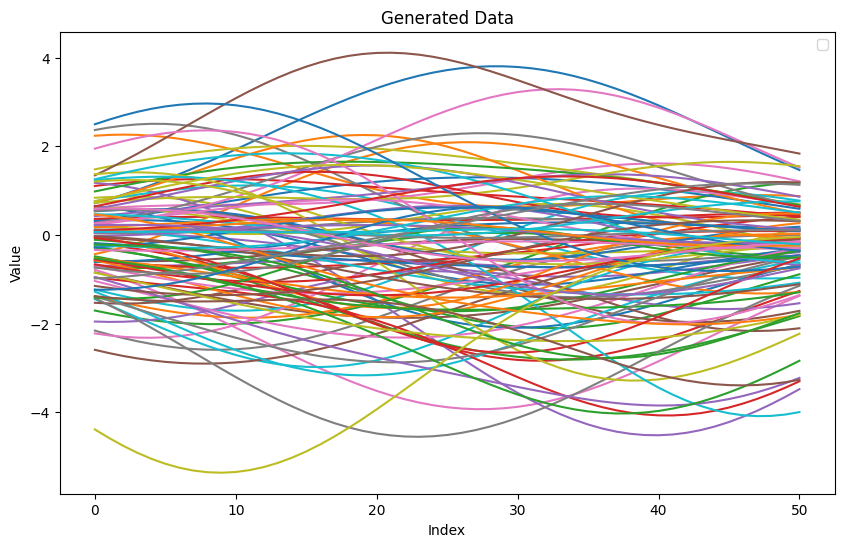

In [63]:
# X 생성 및 개형
np.random.seed(0)
X = data_generate(gamma=7, n=100)

plt.figure(figsize=(10, 6))
for i in range(X.shape[1]):
    plt.plot(X[:, i])

plt.title('Generated Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [19]:
# rho 정의
def rho(t) :
  rho = 0
  np.random.seed(0)
  a = np.random.normal(size = 5)
  for i in range(5):
    rho += np.sqrt(2) * a[i] * np.sin((i/2)* np.pi * t)
  return rho

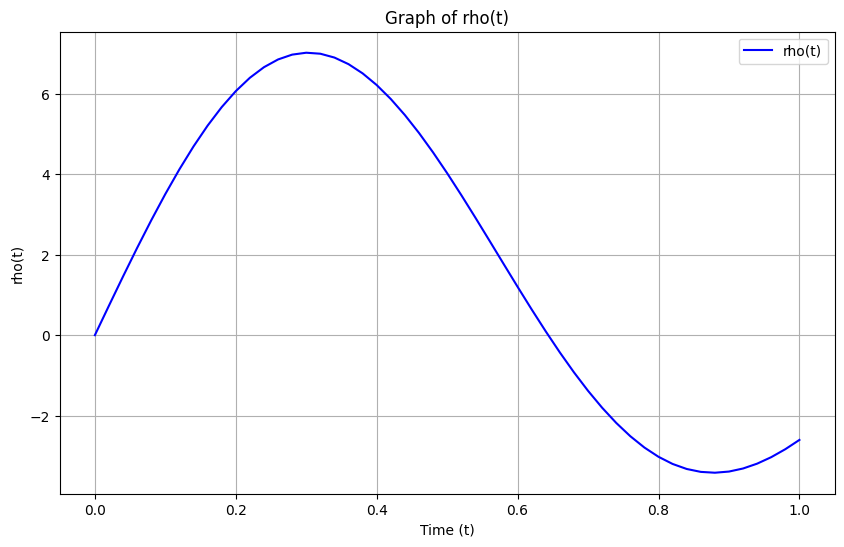

In [64]:
# rho 개형
t = np.linspace(0, 1, 51)
rho_values = [rho(ti) for ti in t]

plt.figure(figsize=(10, 6))
plt.plot(t, rho_values, label='rho(t)', color='b')
plt.xlabel('Time (t)')
plt.ylabel('rho(t)')
plt.title('Graph of rho(t)')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# brownian motion 정의
def brownian_motion(T, N):
    dt = T / float(N)
    t = np.linspace(0, T, N+1)
    W = np.zeros(N+1)

    for i in range(1, N+1):
        dW = np.sqrt(dt) * np.random.normal(0, 1)
        W[i] = W[i-1] + dW

    return t, W

In [54]:
# 모델 정의
def b1(t,kernel = GRB,gamma = 1) :
  return kernel(t,0.6,gamma=gamma)
def b2(t,kernel = GRB,gamma = 1) :
  return kernel(t,0.9,gamma=gamma)
def b3(t,kernel = GRB,gamma = 1) :
  return kernel(t,0.1,gamma=gamma)

def model1(X,gamma = 1, sigma = 0.1):
  grid_X = np.linspace(0, 1, 51)
  grid_y = np.linspace(0, 1, 51)
  b1_t = b1(grid_X)
  b2_t = b2(grid_X)
  rho_t = rho(grid_y)
  _,brownian_t =  brownian_motion(1,50)
  inner_1 = inner_product(X,b1_t,gamma = gamma)
  inner_2 = inner_product(X,b2_t,gamma = gamma)
  y= (1/(np.exp(inner_1) + 1) + inner_2**2) * rho_t + sigma * brownian_t
  return y

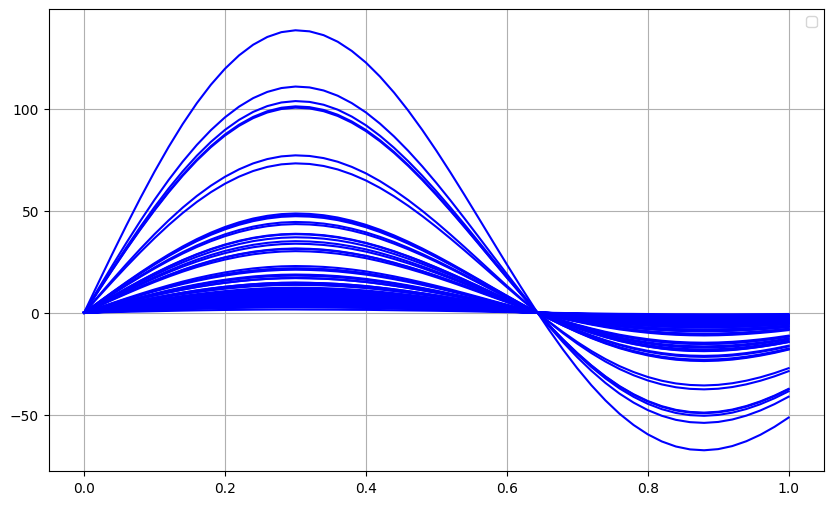

In [71]:
# Y 생성 및 개형
grid_x = np.linspace(0, 1, 51)
grid_y = np.linspace(0, 1, 51)
y = np.zeros((len(grid_y), X.shape[1]))
for n in range(X.shape[1]):
  y[:,n] = model1(X[:,n])

plt.figure(figsize=(10, 6))
for n in range(y.shape[1]):
  plt.plot(grid_y, y[:,n], color='b')
plt.legend()
plt.grid(True)
plt.show()